In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

import numpy as np

In [ ]:
dataPath = "datasets/food-101/food-101/images/"

In [ ]:
batchSize = 16
# imgHeight = 128
# imgWidth = 128

imgHeight = 150
imgWidth = 150


trainDataset = tf.keras.utils.image_dataset_from_directory(
  dataPath,
  validation_split=0.2,
  subset="training",
  # color_mode = "grayscale",
  color_mode = "rgb",
  shuffle = True,
  seed=123,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)

valDataset = tf.keras.utils.image_dataset_from_directory(
  dataPath,
  validation_split=0.2,
  subset="validation",
  # color_mode = "grayscale",
  color_mode = "rgb",
  shuffle = True,
  seed=123,
  image_size=(imgHeight, imgWidth),
  batch_size=batchSize)

Found 7000 files belonging to 7 classes.
Using 5600 files for training.
Found 7000 files belonging to 7 classes.
Using 1400 files for validation.


In [ ]:
valBatch = tf.data.experimental.cardinality(valDataset)
testDataset = valDataset.take((2*valBatch) // 3)
valDataset = valDataset.skip((2*valBatch) // 3)

In [ ]:
classNames = trainDataset.class_names
print(classNames)

['chicken_wings', 'fish_and_chips', 'french_fries', 'hamburger', 'ice_cream', 'onion_rings', 'pizza']


In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in trainDataset.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(classNames[labels[i]])
#     plt.axis("off")

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
trainDataset = trainDataset.map(lambda x, y: (normalization_layer(x), y))

# Reference to normalise test dataset as well: https://datascience.stackexchange.com/questions/27615/should-we-apply-normalization-to-test-data-as-well
valDataset = valDataset.map(lambda x, y: (normalization_layer(x), y))
testDataset = testDataset.map(lambda x, y: (normalization_layer(x), y))


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

# trainDataset = trainDataset.cache().prefetch(buffer_size=AUTOTUNE)

trainDataset = trainDataset.cache().prefetch(buffer_size=AUTOTUNE)
valDataset = valDataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
numClasses = 101

#~60% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStoppingCallback = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=50, #4
  callbacks=[checkpointCallback]
)

Epoch 1/50
348/350 [============================>.] - ETA: 0s - loss: 1.9239 - accuracy: 0.2249
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel.keras
350/350 [==============================] - 13s 28ms/step - loss: 1.9237 - accuracy: 0.2245 - val_loss: 1.7903 - val_accuracy: 0.2924
Epoch 2/50
348/350 [============================>.] - ETA: 0s - loss: 1.7433 - accuracy: 0.3080
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel.keras
350/350 [==============================] - 10s 28ms/step - loss: 1.7432 - accuracy: 0.3080 - val_loss: 1.6374 - val_accuracy: 0.3623
Epoch 3/50
349/350 [============================>.] - ETA: 0s - loss: 1.6684 - accuracy: 0.3544
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel.keras
350/350 [==============================] - 8s 23ms/step - loss: 1.6677 - accuracy: 0.3545 - val_loss: 1.6109 - val_accuracy: 0.3941
Epoch 4/50
349/350 [===========================

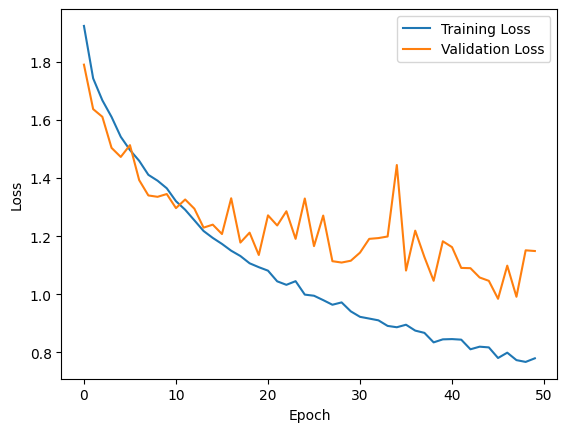

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# CONTINUE TO 100 EPOCH

history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=50,
  callbacks=[checkpointCallback]
)

Epoch 1/50
349/350 [============================>.] - ETA: 0s - loss: 0.7827 - accuracy: 0.7147
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel.keras
350/350 [==============================] - 9s 27ms/step - loss: 0.7831 - accuracy: 0.7150 - val_loss: 1.2232 - val_accuracy: 0.6441
Epoch 2/50
349/350 [============================>.] - ETA: 0s - loss: 0.7542 - accuracy: 0.7369
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel.keras
350/350 [==============================] - 9s 26ms/step - loss: 0.7535 - accuracy: 0.7371 - val_loss: 1.2826 - val_accuracy: 0.6441
Epoch 3/50
350/350 [==============================] - ETA: 0s - loss: 0.7634 - accuracy: 0.7282
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel.keras
350/350 [==============================] - 9s 25ms/step - loss: 0.7634 - accuracy: 0.7282 - val_loss: 1.2607 - val_accuracy: 0.6398
Epoch 4/50
349/350 [============================>

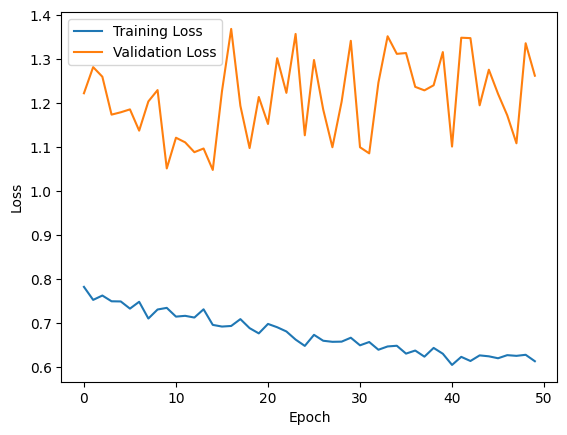

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#~60% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  # tf.keras.layers.RandomContrast(0.5),
  # tf.keras.layers.RandomBrightness(0.5),
  tf.keras.layers.RandomRotation(0.5),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
# define the checkpoint
filepath = "datasets/copyOfMmodel2.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=50, #4
  callbacks=[checkpointCallback]
)

Epoch 1/50
350/350 [==============================] - ETA: 0s - loss: 1.9337 - accuracy: 0.2271
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel2.keras
350/350 [==============================] - 13s 29ms/step - loss: 1.9337 - accuracy: 0.2271 - val_loss: 1.7533 - val_accuracy: 0.2966
Epoch 2/50
348/350 [============================>.] - ETA: 0s - loss: 1.7596 - accuracy: 0.3019
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel2.keras
350/350 [==============================] - 8s 23ms/step - loss: 1.7592 - accuracy: 0.3027 - val_loss: 1.7323 - val_accuracy: 0.2818
Epoch 3/50
349/350 [============================>.] - ETA: 0s - loss: 1.6953 - accuracy: 0.3354
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel2.keras
350/350 [==============================] - 9s 26ms/step - loss: 1.6960 - accuracy: 0.3352 - val_loss: 1.6393 - val_accuracy: 0.3644
Epoch 4/50
349/350 [=========================

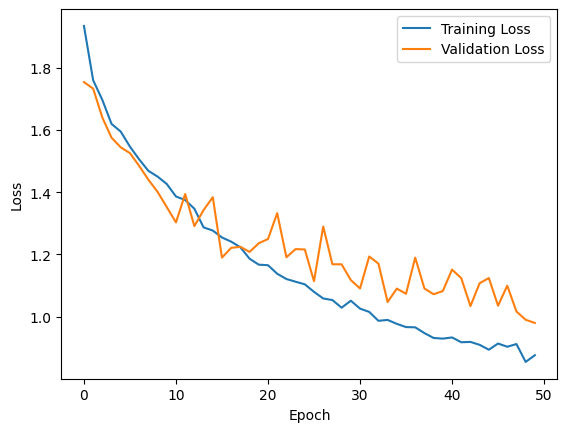

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#~60% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel3.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/100
350/350 [==============================] - ETA: 0s - loss: 1.9228 - accuracy: 0.2355
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel3.keras
350/350 [==============================] - 31s 26ms/step - loss: 1.9228 - accuracy: 0.2355 - val_loss: 1.7682 - val_accuracy: 0.2945
Epoch 2/100
349/350 [============================>.] - ETA: 0s - loss: 1.7635 - accuracy: 0.3003
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel3.keras
350/350 [==============================] - 8s 23ms/step - loss: 1.7635 - accuracy: 0.3002 - val_loss: 1.7417 - val_accuracy: 0.3051
Epoch 3/100
348/350 [============================>.] - ETA: 0s - loss: 1.6932 - accuracy: 0.3429
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel3.keras
350/350 [==============================] - 9s 25ms/step - loss: 1.6932 - accuracy: 0.3429 - val_loss: 1.6222 - val_accuracy: 0.3390
Epoch 4/100
348/350 [=====================

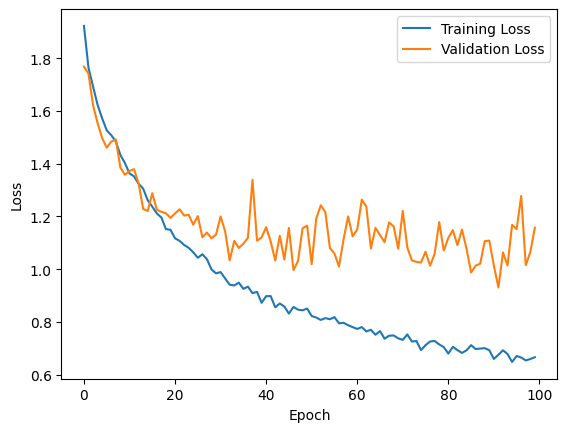

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#~60% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate, weight_decay=0.2),  ## ADDED WEIGHT DECAY = 0.2
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel4WithWeightDecay.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/100
347/350 [============================>.] - ETA: 0s - loss: 1.9532 - accuracy: 0.1988
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel4WithWeightDecay.keras
350/350 [==============================] - 10s 16ms/step - loss: 1.9524 - accuracy: 0.1988 - val_loss: 1.8256 - val_accuracy: 0.2585
Epoch 2/100
349/350 [============================>.] - ETA: 0s - loss: 1.8123 - accuracy: 0.2636
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel4WithWeightDecay.keras
350/350 [==============================] - 7s 19ms/step - loss: 1.8123 - accuracy: 0.2637 - val_loss: 1.7604 - val_accuracy: 0.3008
Epoch 3/100
350/350 [==============================] - ETA: 0s - loss: 1.7686 - accuracy: 0.2873
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel4WithWeightDecay.keras
350/350 [==============================] - 6s 16ms/step - loss: 1.7686 - accuracy: 0.2873 - val_loss: 1.7163 - val_accuracy: 0.30

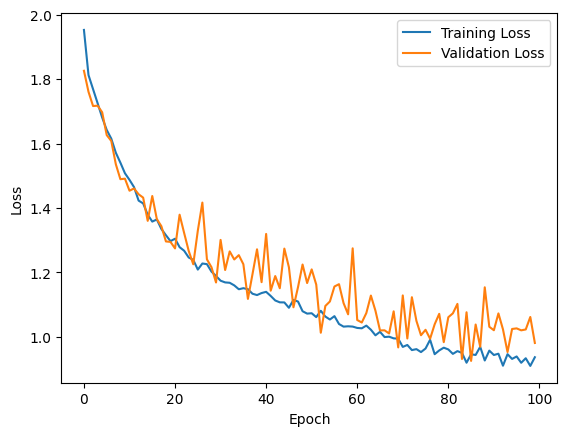

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#LOW ~60% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate, weight_decay=0.2),  ## ADDED WEIGHT DECAY = 0.2
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel5WithWeightDecay.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/100
349/350 [============================>.] - ETA: 0s - loss: 1.9109 - accuracy: 0.2273
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel5WithWeightDecay.keras
350/350 [==============================] - 30s 47ms/step - loss: 1.9105 - accuracy: 0.2271 - val_loss: 1.7993 - val_accuracy: 0.2521
Epoch 2/100
349/350 [============================>.] - ETA: 0s - loss: 1.7968 - accuracy: 0.2706
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel5WithWeightDecay.keras
350/350 [==============================] - 6s 18ms/step - loss: 1.7968 - accuracy: 0.2707 - val_loss: 1.7348 - val_accuracy: 0.2860
Epoch 3/100
349/350 [============================>.] - ETA: 0s - loss: 1.7190 - accuracy: 0.3338
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel5WithWeightDecay.keras
350/350 [==============================] - 7s 21ms/step - loss: 1.7187 - accuracy: 0.3341 - val_loss: 1.6232 - val_accuracy: 0.39

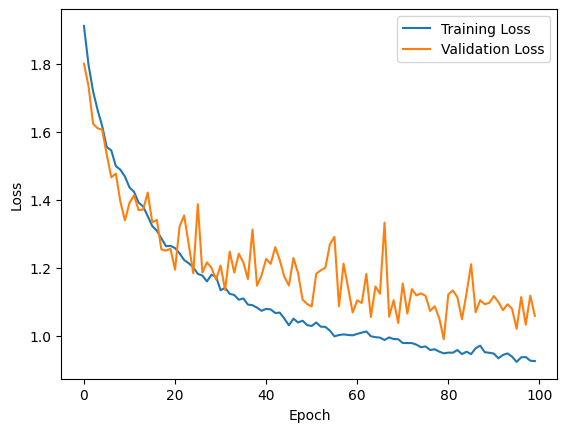

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#~60% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel6.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/100
350/350 [==============================] - ETA: 0s - loss: 1.8797 - accuracy: 0.2496
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel6.keras
350/350 [==============================] - 13s 29ms/step - loss: 1.8797 - accuracy: 0.2496 - val_loss: 1.7744 - val_accuracy: 0.2669
Epoch 2/100
349/350 [============================>.] - ETA: 0s - loss: 1.7447 - accuracy: 0.3034
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel6.keras
350/350 [==============================] - 6s 17ms/step - loss: 1.7445 - accuracy: 0.3036 - val_loss: 1.6989 - val_accuracy: 0.3136
Epoch 3/100
350/350 [==============================] - ETA: 0s - loss: 1.6756 - accuracy: 0.3548
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel6.keras
350/350 [==============================] - 7s 20ms/step - loss: 1.6756 - accuracy: 0.3548 - val_loss: 1.7698 - val_accuracy: 0.3051
Epoch 4/100
348/350 [=====================

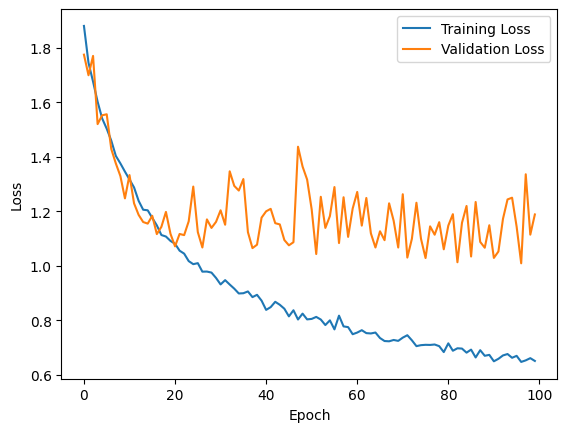

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Conv2D(32, 2, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 2, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 2, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 2, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel7.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/100
350/350 [==============================] - ETA: 0s - loss: 1.8727 - accuracy: 0.2568
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel7.keras
350/350 [==============================] - 12s 17ms/step - loss: 1.8727 - accuracy: 0.2568 - val_loss: 1.7279 - val_accuracy: 0.3114
Epoch 2/100
349/350 [============================>.] - ETA: 0s - loss: 1.7082 - accuracy: 0.3381
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel7.keras
350/350 [==============================] - 7s 20ms/step - loss: 1.7083 - accuracy: 0.3380 - val_loss: 1.6385 - val_accuracy: 0.3517
Epoch 3/100
350/350 [==============================] - ETA: 0s - loss: 1.6328 - accuracy: 0.3670
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel7.keras
350/350 [==============================] - 6s 17ms/step - loss: 1.6328 - accuracy: 0.3670 - val_loss: 1.5909 - val_accuracy: 0.3983
Epoch 4/100
348/350 [=====================

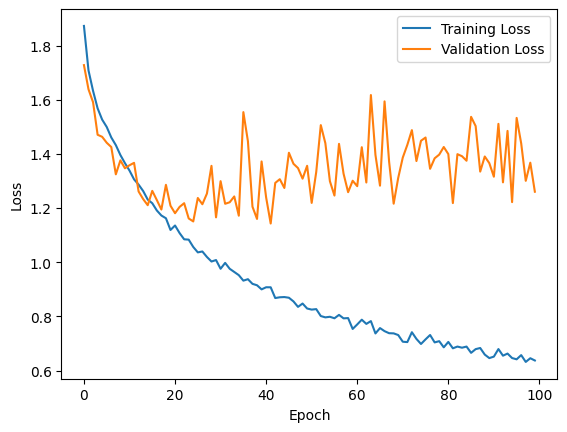

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#VERY LOW ~60% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Conv2D(32, 3, padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.ReLU(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel8.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/100
349/350 [============================>.] - ETA: 0s - loss: 2.7897 - accuracy: 0.2577
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel8.keras
350/350 [==============================] - 13s 22ms/step - loss: 2.7871 - accuracy: 0.2580 - val_loss: 1.8790 - val_accuracy: 0.2479
Epoch 2/100
349/350 [============================>.] - ETA: 0s - loss: 1.6972 - accuracy: 0.3490
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel8.keras
350/350 [==============================] - 8s 24ms/step - loss: 1.6969 - accuracy: 0.3491 - val_loss: 1.6277 - val_accuracy: 0.3475
Epoch 3/100
349/350 [============================>.] - ETA: 0s - loss: 1.6400 - accuracy: 0.3680
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel8.keras
350/350 [==============================] - 7s 21ms/step - loss: 1.6402 - accuracy: 0.3679 - val_loss: 1.8523 - val_accuracy: 0.2542
Epoch 4/100
348/350 [=====================

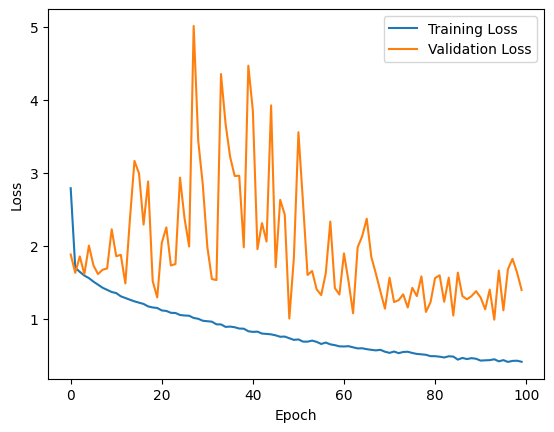

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#VERY LOW ~60% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.1),
  # tf.keras.layers.RandomBrightness(0.1),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel9.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/100
349/350 [============================>.] - ETA: 0s - loss: 1.9138 - accuracy: 0.2425
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel9.keras
350/350 [==============================] - 18s 43ms/step - loss: 1.9131 - accuracy: 0.2427 - val_loss: 1.7578 - val_accuracy: 0.2754
Epoch 2/100
350/350 [==============================] - ETA: 0s - loss: 1.7481 - accuracy: 0.3050
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel9.keras
350/350 [==============================] - 13s 37ms/step - loss: 1.7481 - accuracy: 0.3050 - val_loss: 1.6572 - val_accuracy: 0.3220
Epoch 3/100
350/350 [==============================] - ETA: 0s - loss: 1.6815 - accuracy: 0.3571
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel9.keras
350/350 [==============================] - 14s 39ms/step - loss: 1.6815 - accuracy: 0.3571 - val_loss: 1.6028 - val_accuracy: 0.3877
Epoch 4/100
350/350 [===================

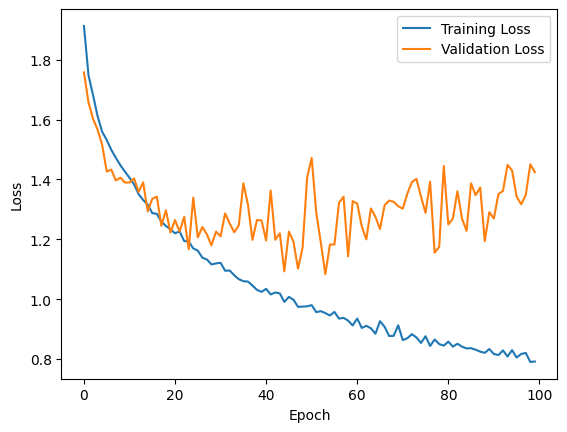

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#(<60%) ~50% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.1),
  # tf.keras.layers.RandomBrightness(0.1),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel10.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/100
349/350 [============================>.] - ETA: 0s - loss: 1.8873 - accuracy: 0.2427
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel10.keras
350/350 [==============================] - 12s 24ms/step - loss: 1.8871 - accuracy: 0.2425 - val_loss: 1.7301 - val_accuracy: 0.3030
Epoch 2/100
348/350 [============================>.] - ETA: 0s - loss: 1.7467 - accuracy: 0.3197
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel10.keras
350/350 [==============================] - 9s 25ms/step - loss: 1.7471 - accuracy: 0.3196 - val_loss: 1.6426 - val_accuracy: 0.3686
Epoch 3/100
348/350 [============================>.] - ETA: 0s - loss: 1.6655 - accuracy: 0.3622
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel10.keras
350/350 [==============================] - 8s 23ms/step - loss: 1.6656 - accuracy: 0.3625 - val_loss: 1.5653 - val_accuracy: 0.3898
Epoch 4/100
348/350 [==================

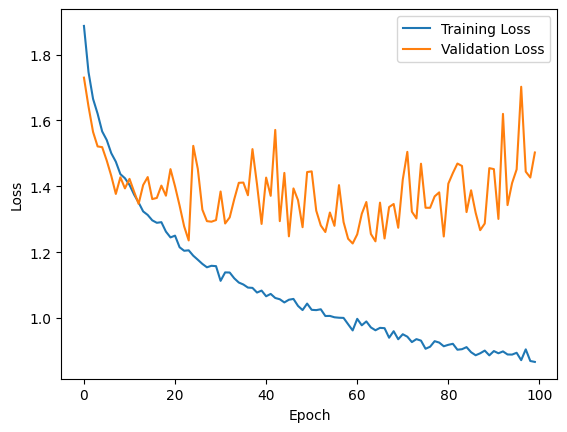

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#VERY LOW ~60% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.1),
  # tf.keras.layers.RandomBrightness(0.1),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel11.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/100
347/350 [============================>.] - ETA: 0s - loss: 1.8863 - accuracy: 0.2464
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel11.keras
350/350 [==============================] - 9s 17ms/step - loss: 1.8850 - accuracy: 0.2477 - val_loss: 1.7279 - val_accuracy: 0.3284
Epoch 2/100
348/350 [============================>.] - ETA: 0s - loss: 1.7358 - accuracy: 0.3175
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel11.keras
350/350 [==============================] - 5s 14ms/step - loss: 1.7362 - accuracy: 0.3175 - val_loss: 1.6855 - val_accuracy: 0.3496
Epoch 3/100
348/350 [============================>.] - ETA: 0s - loss: 1.6617 - accuracy: 0.3603
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel11.keras
350/350 [==============================] - 5s 16ms/step - loss: 1.6617 - accuracy: 0.3609 - val_loss: 1.5961 - val_accuracy: 0.3877
Epoch 4/100
349/350 [===================

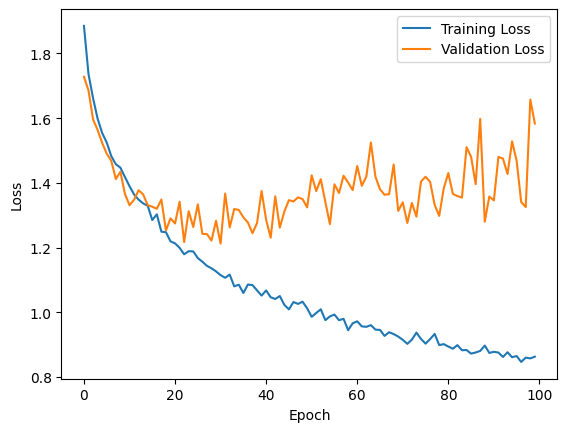

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#LOW ~60% Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomCrop(128, 128, seed=123),
  tf.keras.layers.RandomTranslation(0.2, 0.2),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(numClasses)
])

In [ ]:
learningRate = 1e-3

model.compile(
  optimizer=tf.keras.optimizers.Adam(learningRate),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

# Reference to save and load model to continue training: https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training

# define the checkpoint
filepath = "datasets/copyOfMmodel12.keras"

# To save current model in execution
checkpointCallback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
# callbacksList = [checkpoint]

In [ ]:
history = model.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/100
348/350 [============================>.] - ETA: 0s - loss: 1.8650 - accuracy: 0.2602
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel12.keras
350/350 [==============================] - 15s 32ms/step - loss: 1.8647 - accuracy: 0.2604 - val_loss: 1.6811 - val_accuracy: 0.3347
Epoch 2/100
349/350 [============================>.] - ETA: 0s - loss: 1.7002 - accuracy: 0.3455
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel12.keras
350/350 [==============================] - 11s 31ms/step - loss: 1.7000 - accuracy: 0.3455 - val_loss: 1.6161 - val_accuracy: 0.3559
Epoch 3/100
348/350 [============================>.] - ETA: 0s - loss: 1.6251 - accuracy: 0.3757
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel12.keras
350/350 [==============================] - 11s 31ms/step - loss: 1.6253 - accuracy: 0.3762 - val_loss: 1.5668 - val_accuracy: 0.4131
Epoch 4/100
348/350 [================

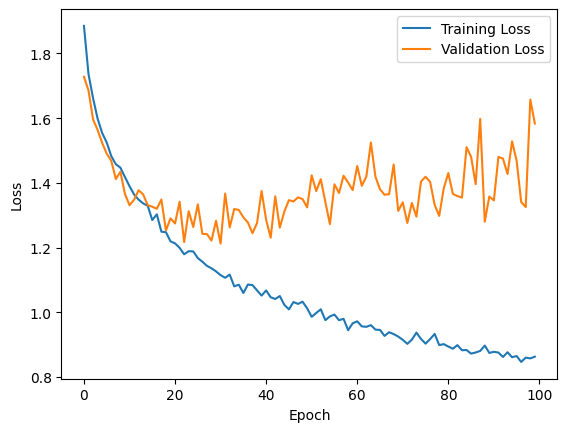

In [ ]:
# Plot training and validation loss curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_8 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_rotation_8 (RandomR  (None, 150, 150, 3)       0         
 otation)                                                        
                                                                 
 random_crop_7 (RandomCrop)  (None, 128, 128, 3)       0         
                                                                 
 random_translation_7 (Rand  (None, 128, 128, 3)       0         
 omTranslation)                                                  
                                                                 
 random_zoom_2 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 128, 128, 32)     

In [ ]:
########## TO LOAD MODEL

filepath = "datasets/copyOfMmodel.keras" # CHANGE TO MODEL NAME WITH KERAS FORMAT OR H5 FORMAT, WHICHEVER IS YOUR MODEL FILE FORMAT

## FOR KERAS MODEL. Reference: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/save_and_load.ipynb#scrollTo=8BT4mHNIvMdW
loadedModel = tf.keras.models.load_model(filepath)

# continue fit the model (may not work as expected? Try first)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')

history = loadedModel.fit(
  trainDataset,
  validation_data=valDataset,
  epochs=100,
  callbacks=[checkpointCallback]
)

Epoch 1/4
1262/1263 [============================>.] - ETA: 0s - loss: 2.2834 - accuracy: 0.4126
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel.keras
1263/1263 [==============================] - 125s 96ms/step - loss: 2.2831 - accuracy: 0.4127 - val_loss: 4.1251 - val_accuracy: 0.1792
Epoch 2/4
1262/1263 [============================>.] - ETA: 0s - loss: 2.0037 - accuracy: 0.4735
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel.keras
1263/1263 [==============================] - 156s 124ms/step - loss: 2.0037 - accuracy: 0.4735 - val_loss: 4.3201 - val_accuracy: 0.1789
Epoch 3/4
1262/1263 [============================>.] - ETA: 0s - loss: 1.7539 - accuracy: 0.5277
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/betterCopyOfMmodel.keras
1263/1263 [==============================] - 113s 89ms/step - loss: 1.7537 - accuracy: 0.5278 - val_loss: 4.7775 - val_accuracy: 0.1789
Epoch 4/4
1262/1263 [============

In [ ]:
# Evaluate the restored model
loss, acc = loadedModel.evaluate(testDataset, classNames, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [ ]:
# MAY NEED REWRITING
prediction = model.predict(testDataset.take(1))
print(prediction)
print(prediction.shape)
predictedClassIndices = np.argmax(prediction, axis = 1)
print(predictedClassIndices)
predictedClassLabel = np.array(classNames)[predictedClassIndices]

print(predictedClassLabel)

plt.figure(figsize=(10, 10))
for images, labels in testDataset.take(1):

    print(np.array(classNames)[np.array(labels)])